# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [90]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [ ]:
# Your code here :
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [18]:
# Your code here :
# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
# Your code here :
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

# print
print(f"R2 of training data: {r2_train}")
print(f"R2 of testing data: {r2_test}")

R2 of training data: 0.7508856358979672
R2 of testing data: 0.668759493535633


## 4. Calculate and print mean squared error for both the training and the testing set.

In [22]:
# Your code here :
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

# print
print(f"MSE for training data: {mse_train}")
print(f"MSE for testing data: {mse_test}")

print(f"RMSE for training data: {rmse_train}")
print(f"RMSE for testing data: {rmse_test}")

MSE for training data: 21.641412753226316
MSE for testing data: 24.291119474973442
RMSE for training data: 4.6520331848801675
RMSE for testing data: 4.928602182665329


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [23]:
# Your code here :
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

# print
print(f"MAE for training data: {mae_train}")
print(f"MAE for testing data: {mae_test}")

MAE for training data: 3.3147716267832266
MAE for testing data: 3.1890919658878323


## Classification Model Evaluation

In [24]:
from sklearn.datasets import load_iris
data = load_iris()

In [26]:
type(data)

sklearn.utils._bunch.Bunch

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [27]:
column_names = data.feature_names

In [28]:
df = pd.DataFrame(data['data'],columns=column_names)

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target = pd.DataFrame(data.target)

In [33]:
target.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [35]:
# Your code here :
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [37]:
# Your code here :
# training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [41]:
# Your code here :
print(f"Classification report with training data: \n")
print(classification_report(y_train, predictions_train))

print(f"Classification report with testing data: \n")
print(classification_report(y_test, predictions_test))

Classification report with training data: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification report with testing data: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [59]:
# training data
class_rep_train = classification_report(y_train, predictions_train, output_dict=True)
print(f"Accuracy score for training data: {class_rep_train["accuracy"]}")

# testing data
class_rep_test = classification_report(y_test, predictions_test, output_dict=True)
print(f"Accuracy score for testing data: {round(class_rep_test["accuracy"], 2)}")

Accuracy score for training data: 1.0
Accuracy score for testing data: 0.97


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [63]:
# Your code here :
# Compute balanced accuracy
balanced_acc_train = balanced_accuracy_score(y_train, predictions_train)
print("Balanced accuracy for training data:", balanced_acc_train)


balanced_acc_test = balanced_accuracy_score(y_test, predictions_test)
print("Balanced accuracy for testing data:", round(balanced_acc_test, 2))

Balanced accuracy for training data: 1.0
Balanced accuracy for testing data: 0.97


## 10. Calculate and print the precision score for both the training and the testing set.

In [81]:
# Your code here :
print(f"Precision scores accross categories for training data:")
for i in range(3):
    print(f"{i}: {round(class_rep_train[str(i)]["precision"], 2)}")

print("\n")
print(f"Precision scores accross categories for testing data:")
for i in range(3):
    print(f"{i}: {round(class_rep_test[str(i)]["precision"], 2)}")

Precision scores accross categories for training data:
0: 1.0
1: 1.0
2: 1.0


Precision scores accross categories for testing data:
0: 1.0
1: 0.97
2: 0.93


## 11. Calculate and print the recall score for both the training and the testing set.

In [82]:
# Your code here :
print(f"Recall scores accross categories for training data:")
for i in range(3):
    print(f"{i}: {round(class_rep_train[str(i)]["recall"], 2)}")

print("\n")
print(f"Recall scores accross categories for testing data:")
for i in range(3):
    print(f"{i}: {round(class_rep_test[str(i)]["recall"], 2)}")

Recall scores accross categories for training data:
0: 1.0
1: 1.0
2: 1.0


Recall scores accross categories for testing data:
0: 1.0
1: 0.92
2: 0.97


## 12. Calculate and print the F1 score for both the training and the testing set.

In [83]:
# Your code here :
print(f"F1 scores accross categories for training data:")
for i in range(3):
    print(f"{i}: {round(class_rep_train[str(i)]["f1-score"], 2)}")

print("\n")
print(f"F1 scores accross categories for testing data:")
for i in range(3):
    print(f"{i}: {round(class_rep_test[str(i)]["f1-score"], 2)}")

F1 scores accross categories for training data:
0: 1.0
1: 1.0
2: 1.0


F1 scores accross categories for testing data:
0: 1.0
1: 0.95
2: 0.95


## 13. Generate confusion matrices for both the training and the testing set.

In [84]:
# Your code here :
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)

<Figure size 800x600 with 0 Axes>

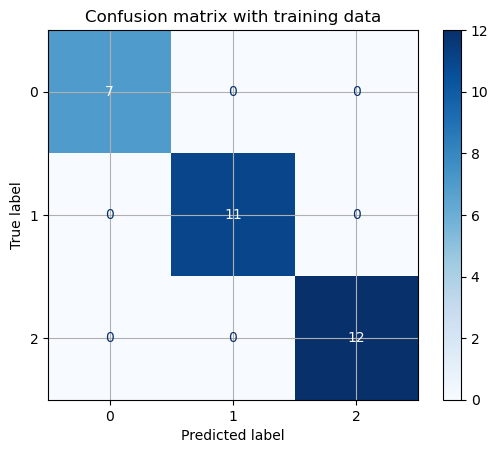

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion matrix with training data")  
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

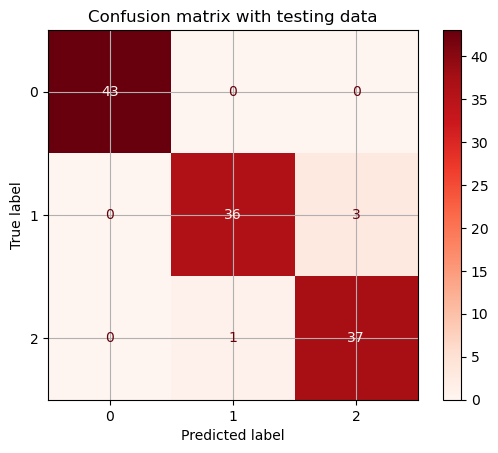

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Reds')
plt.title("Confusion matrix with testing data")  
plt.grid(True)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [104]:
# Have fun here !
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn = model.fit(X_train, y_train)

In [105]:
# predictions
predictions_train_knn = model_knn.predict(X_train)
predictions_test_knn = model_knn.predict(X_test)

In [106]:
# classification report :
print(f"Classification report with training data for KNN: \n")
print(classification_report(y_train, predictions_train_knn))

print(f"Classification report with testing data for KNN: \n")
print(classification_report(y_test, predictions_test_knn))

Classification report with training data for KNN: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification report with testing data for KNN: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [107]:
# Your code here :
print(f"Classification report with training data for Logistic Regression: \n")
print(classification_report(y_train, predictions_train))

print(f"Classification report with testing data for Logistic Regression: \n")
print(classification_report(y_test, predictions_test))

Classification report with training data for Logistic Regression: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification report with testing data for Logistic Regression: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



**Summary**
- Both Logistic Regression and KNN work well with this dataset.
- The classification report is same for both the models.